# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_complete = pd.merge( study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [190]:
# Checking the number of mice.
mouse_metadata = mouse_results_complete["Mouse ID"].nunique()
mouse_metadata 

249

In [191]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_results_complete[mouse_results_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = np.unique(duplicates["Mouse ID"])
duplicate_mice

array(['g989'], dtype=object)

In [192]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = mouse_results_complete[mouse_results_complete["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_results = mouse_results_complete[~mouse_results_complete["Mouse ID"].isin(duplicate_mice)]
clean_mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [194]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = clean_mouse_results["Mouse ID"].nunique()
unique_mice_count_clean

248

## Summary Statistics

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean=np.mean,
    Median=np.median,
    Variance=np.var,
    Standard_Deviation=np.std,
    SEM=st.sem
)
drug_regimen


C:\Users\LabUser\AppData\Local\Temp\ipykernel_8336\4109070878.py:7: FutureWarning: The provided callable <function mean at 0x000002812B3DDFC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  drug_regimen = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
C:\Users\LabUser\AppData\Local\Temp\ipykernel_8336\4109070878.py:7: FutureWarning: The provided callable <function median at 0x000002812C4ECB80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  drug_regimen = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
C:\Users\LabUser\AppData\Local\Temp\ipykernel_8336\4109070878.py:7: FutureWarning: The provided callable <function var at 0x000002812B3DE200> is currently using SeriesGroupBy.var. In a fut

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [196]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

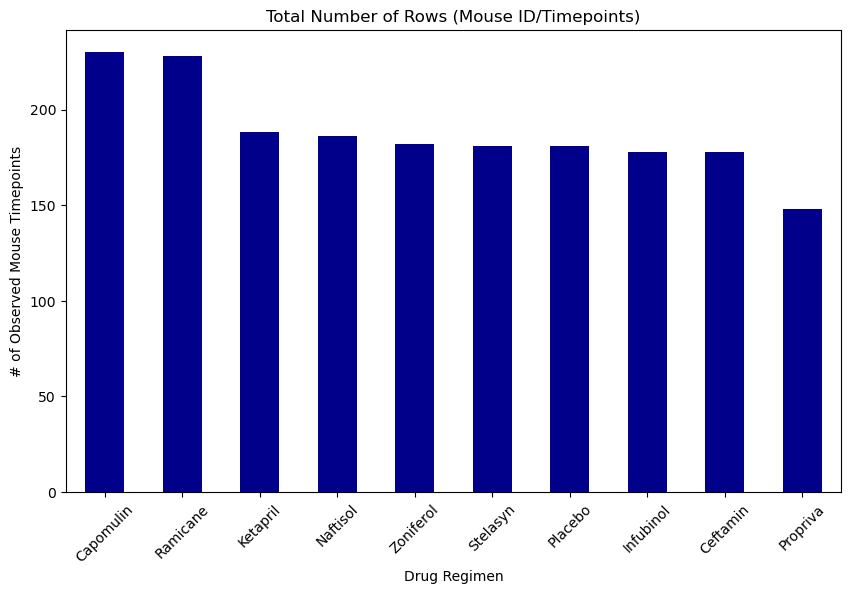

In [197]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_mouse_results["Drug Regimen"].value_counts()

regimen_counts.plot(kind='bar', figsize=(10,6), color='darkblue')
plt.title("Total Number of Rows (Mouse ID/Timepoints)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()


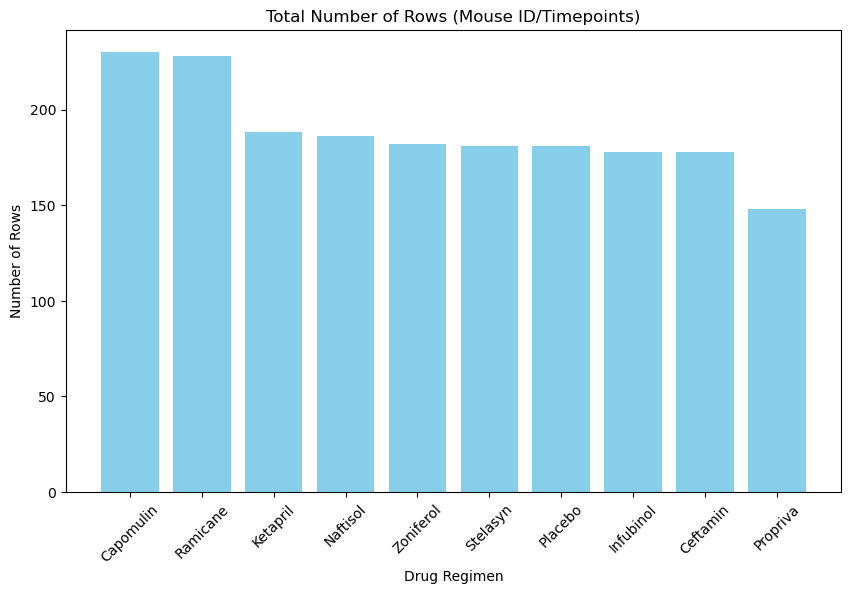

In [198]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title("Total Number of Rows (Mouse ID/Timepoints)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.show()

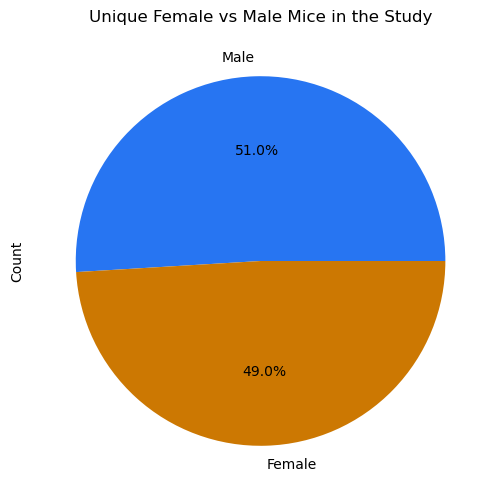

In [199]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = clean_mouse_results["Sex"].value_counts()

# Make the pie chart
sex_distribution.plot.pie(
    autopct="%1.1f%%", 
    colors=["#2775f2","#cc7802"],
    title="Unique Female vs Male Mice in the Study",
    figsize=(8, 6)
)
plt.ylabel("Count") 
plt.show()

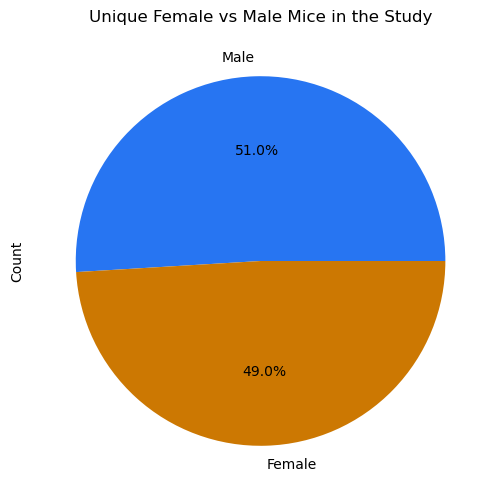

In [200]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = clean_mouse_results['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['#2775f2','#cc7802'])
plt.title('Unique Female vs Male Mice in the Study')
plt.ylabel("Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [201]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_results = clean_mouse_results[clean_mouse_results["Drug Regimen"].isin(regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = filtered_results.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_results = pd.merge(final_timepoints, mouse_results_complete, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volumes = final_results[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen","Sex", "Age_months", "Weight (g)" ]]
final_tumor_volumes
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_volume_last = pd.merge(final_timepoints, clean_mouse_results, on=["Mouse ID", "Timepoint"], how="right")
Tumor_volume_last

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [202]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset

    # Determine outliers using upper and lower bounds
tumor_vol_data = []
for regimen in regimens:
    regimen_data = final_results.loc[final_results["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    tumor_vol_data.append(regimen_data)

quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"{regimen} treatment:")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
print(f"Potential outliers: {outliers}")
print()

Ceftamin treatment:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



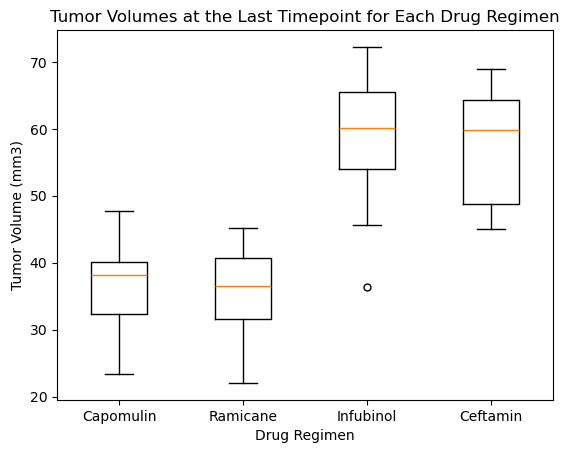

In [203]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=regimens, flierprops=dict(marker='o', color='red', markersize=5))
ax.set_title('Tumor Volumes at the Last Timepoint for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

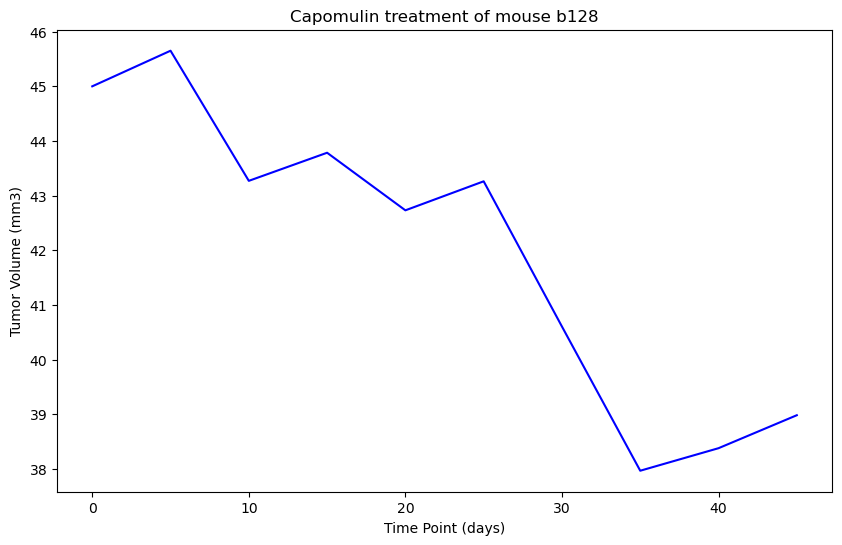

In [204]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_results[clean_mouse_results["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].unique()[0]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='b')
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)
plt.show()

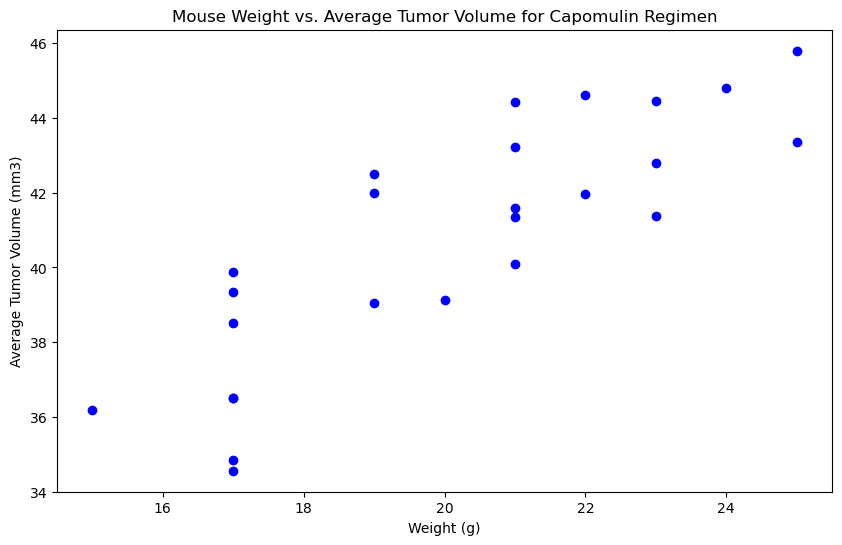

In [205]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_results[clean_mouse_results["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
average_tumor_volume = average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_weight = mouse_metadata[["Mouse ID", "Weight (g)"]]
merged_data = pd.merge(average_tumor_volume, mouse_weight, on="Mouse ID")

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"], color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84: 0.841936342469472


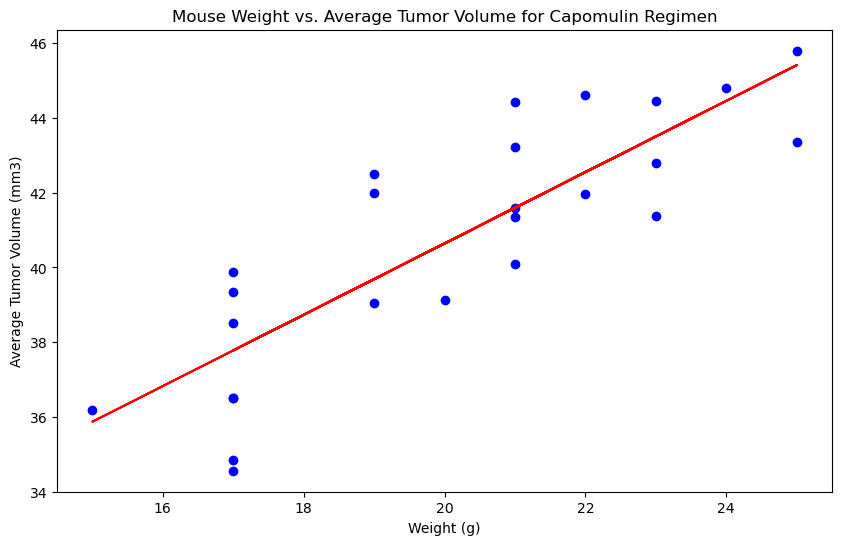

In [208]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient between mouse weight and the average tumor volume is 0.84: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"])

regress_values = merged_data["Weight (g)"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"], color='b')
plt.plot(merged_data["Weight (g)"], regress_values, color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()